In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import random
import math
import time
import func3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


## Problem 1:

In [3]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_x = torch.Tensor( testset.data ) / 256.0 - 0.5
test_x = test_x.to(device)
test_y = torch.Tensor( testset.targets ).long()
test_y = test_y.to(device)
train_x = torch.Tensor( trainset.data ) / 256.0 - 0.5
train_x = train_x.to(device)
train_y = torch.Tensor( trainset.targets ).long()
train_y = train_y.to(device)


In [6]:
linearModel = func3.LinearSoftmaxRegression()
func3.trainNetwork(linearModel, device, train_x, train_y, test_x, test_y, nn.CrossEntropyLoss(), optim.Adam, 256, 0.0004)

epochs: 1 total Loss over Batches: 293.7445607185364 test loss: 2.344290256500244
epochs: 2 total Loss over Batches: 149.97844633460045 test loss: 0.745248019695282
epochs: 3 total Loss over Batches: 116.53480476140976 test loss: 0.5235834717750549
epochs: 4 total Loss over Batches: 102.89787861704826 test loss: 0.4398431181907654
epochs: 5 total Loss over Batches: 95.07807487249374 test loss: 0.3962467312812805
epochs: 6 total Loss over Batches: 89.66451862454414 test loss: 0.37010401487350464
epochs: 7 total Loss over Batches: 84.0498874783516 test loss: 0.35252952575683594
epochs: 8 total Loss over Batches: 79.97777679562569 test loss: 0.3371230363845825
epochs: 9 total Loss over Batches: 80.22379939258099 test loss: 0.3304433226585388
epochs: 10 total Loss over Batches: 75.66945685446262 test loss: 0.31826475262641907
epochs: 11 total Loss over Batches: 74.81352651119232 test loss: 0.3138311803340912
epochs: 12 total Loss over Batches: 74.2449720799923 test loss: 0.3083432316780090

(30.469266414642334, 0.2884860634803772, 0.284991592168808)

In [4]:
def imshow(img):
    img = img /256
    plt.imshow( img )
    plt.show()

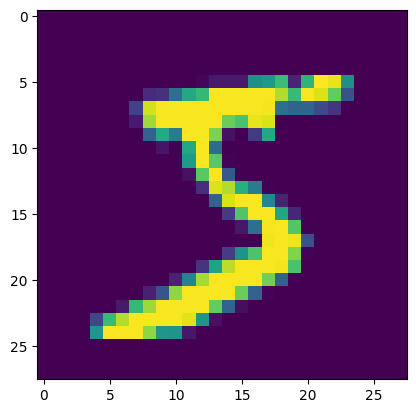

tensor(5)
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   

tensor([[1.4053e-03, 2.9106e-05, 2.6854e-03,  ..., 3.7449e-03, 1.8943e-03,
         1.1021e-03],
        [9.9956e-01, 1.3092e-09, 1.6177e-05,  ..., 5.2273e-06, 1.9228e-05,
         6.5813e-06],
        [1.2406e-04, 3.3374e-04, 1.1604e-02,  ..., 1.1036e-02, 2.2267e-03,
         2.3497e-02],
        ...,
        [4.6947e-05, 4.6343e-05, 2.0140e-06,  ..., 2.3951e-04, 1.0424e-02,
         2.3856e-03],
        [2.0943e-02, 3.5091e-05, 8.1279e-03,  ..., 1.5488e-03, 4.0322e-04,
         1.9062e-03],
        [5.9250e-02, 5.9296e-05, 7.9613e-03,  ..., 2.1470e-03, 7.6982e-01,
         1.0502e-01]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [37]:
imshow(trainset.data[0])
print(trainset.targets[0])
print(trainset.data[0])
torch.softmax(linearModel.forward(train_x), dim=1)

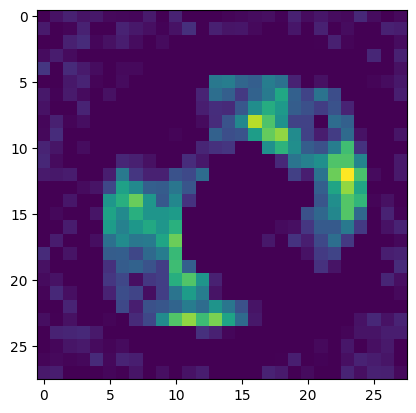

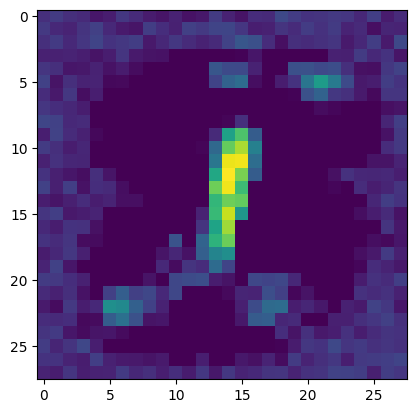

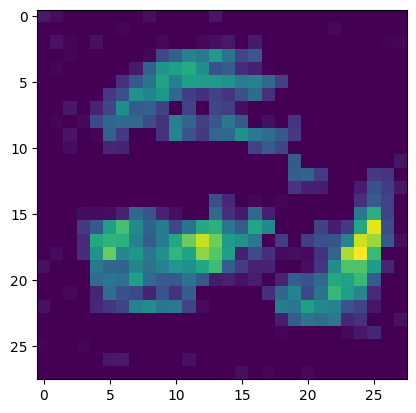

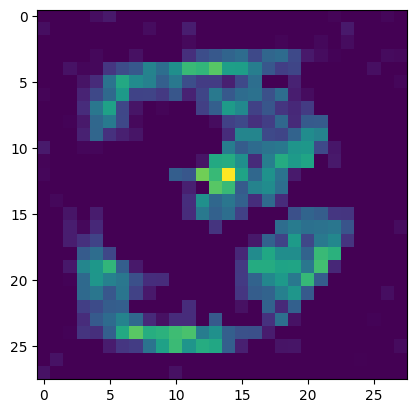

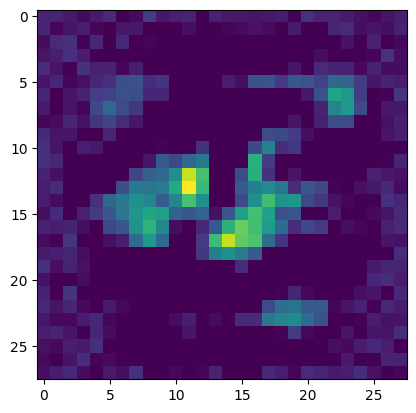

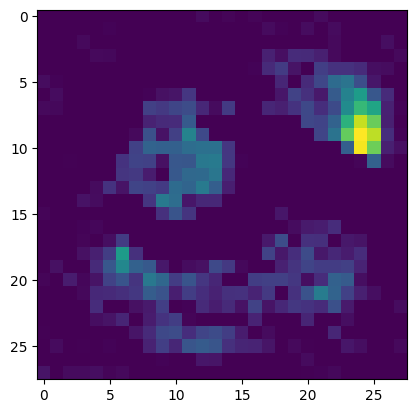

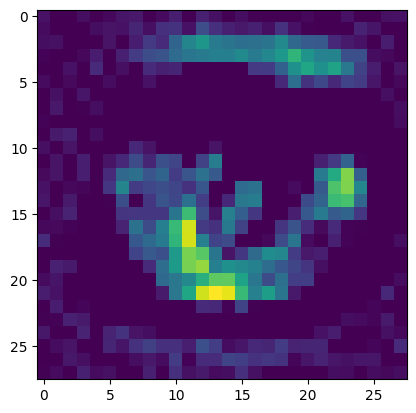

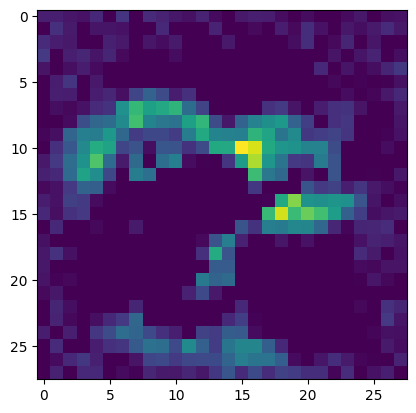

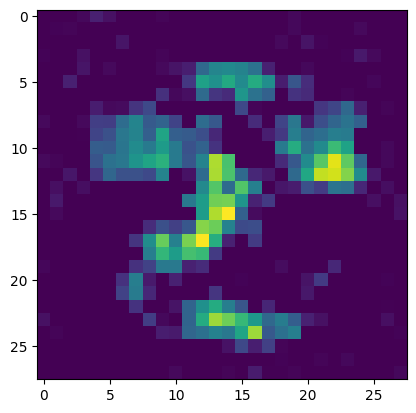

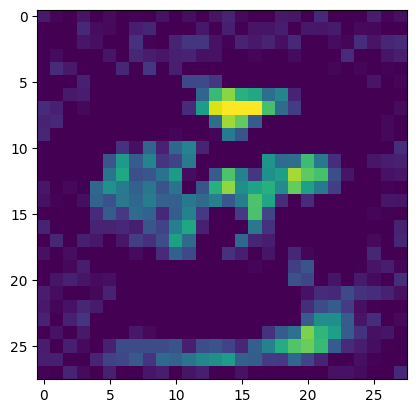

In [16]:
for j in range(10):
    # with torch.no_grad():
    picTry = torch.rand((1,28, 28), requires_grad = True, device=device)
    # picTry.requires_grad
    # normalizer = nn.LayerNorm((28,28)).to(device)
    optimizer = optim.Adam([picTry], lr = 0.001, weight_decay = 0.00001)
    # relu = nn.ReLU().to(device)
    for i in range(150000):
        optimizer.zero_grad()
        loss = torch.nn.CrossEntropyLoss()(linearModel((torch.clamp(picTry, min = 0.0001, max = 1).to(device))-0.5),torch.tensor([j], device=device))
        loss.backward()
        optimizer.step()
        if i % 10000 == 0 and False:
            imshow(256*picTry[0].cpu().detach().numpy())
            # imshow(nn.LayerNorm((28,28)).to(device)(picTry)[0].cpu().detach().numpy())
            print(picTry)
            print(loss.item())
    imshow(256*torch.clamp(picTry, min = 0.0001, max = 1)[0].cpu().detach().numpy())

In [18]:
bestModel = func3.badVGGDec()
func3.trainNetwork(bestModel, device, train_x, train_y, test_x, test_y, nn.CrossEntropyLoss(), optim.Adam, 256, 0.0004)

epochs: 1 total Loss over Batches: 125.12102718651295 test loss: 2.458749532699585
epochs: 2 total Loss over Batches: 44.946071811020374 test loss: 0.24318620562553406
epochs: 3 total Loss over Batches: 32.46759616211057 test loss: 0.17537321150302887
epochs: 4 total Loss over Batches: 26.272113256156445 test loss: 0.13703958690166473
epochs: 5 total Loss over Batches: 21.80734996125102 test loss: 0.1322656124830246
epochs: 6 total Loss over Batches: 17.533923434093595 test loss: 0.10671824961900711
epochs: 7 total Loss over Batches: 15.371526604518294 test loss: 0.10280114412307739
epochs: 8 total Loss over Batches: 14.595445670187473 test loss: 0.10664329677820206
epochs: 9 total Loss over Batches: 14.896610494703054 test loss: 0.09275944530963898
epochs: 10 total Loss over Batches: 12.303254654631019 test loss: 0.09481074661016464
epochs: 11 total Loss over Batches: 11.696275237947702 test loss: 0.08144041150808334
epochs: 12 total Loss over Batches: 11.199329141993076 test loss: 0.

(53.96915888786316, 0.022009382024407387, 0.08253919333219528)

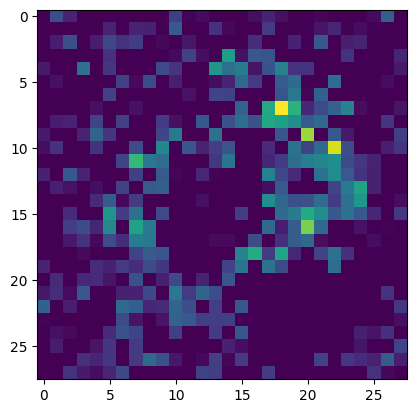

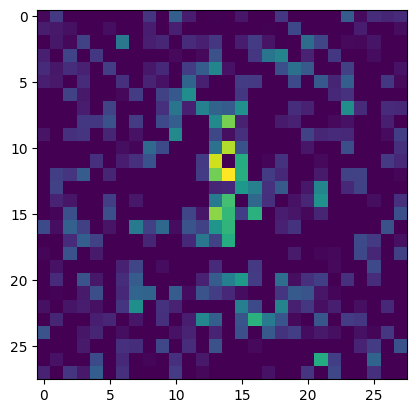

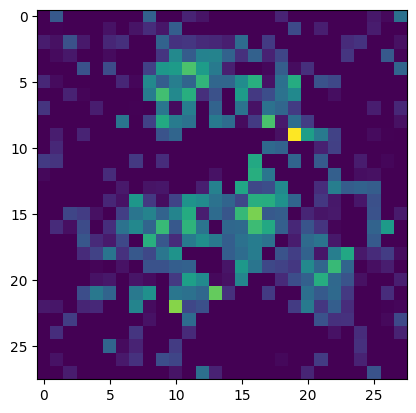

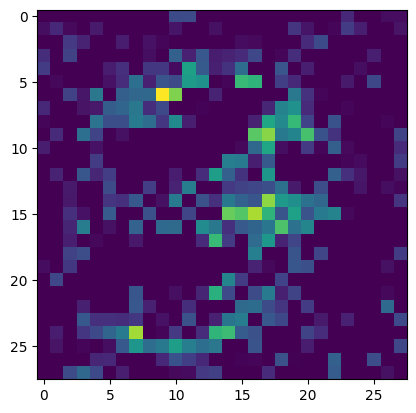

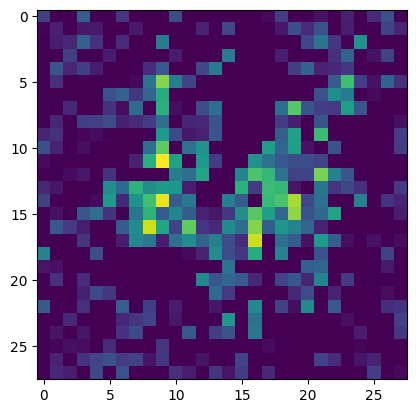

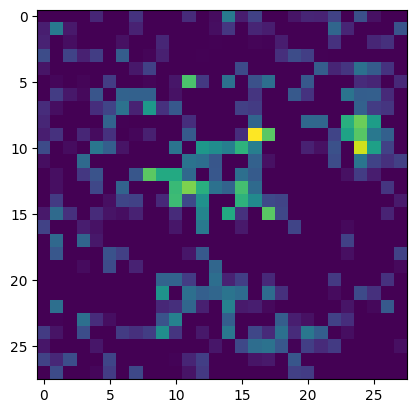

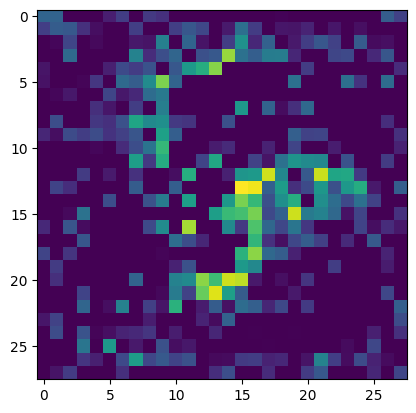

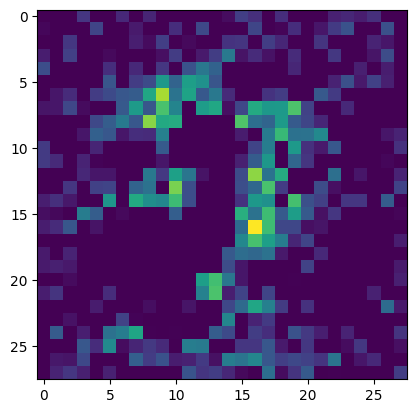

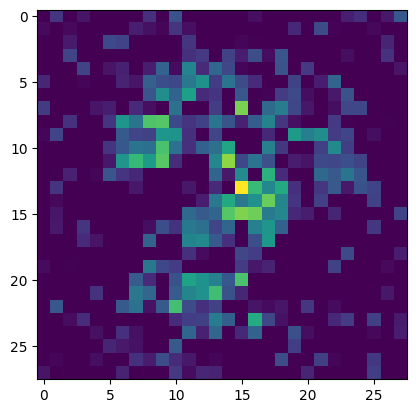

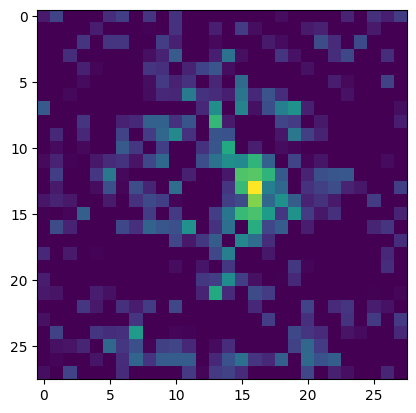

In [20]:
for j in range(10):
    picTry = torch.rand((1,28, 28), requires_grad = True, device=device)
    # normalizer = nn.LayerNorm((28,28)).to(device)
    optimizer = optim.Adam([picTry], lr = 0.001, weight_decay = 0.00001)
    # relu = nn.ReLU().to(device)
    for i in range(150000):
        optimizer.zero_grad()
        loss = torch.nn.CrossEntropyLoss()(bestModel((torch.clamp(picTry, min = 0.0001, max = 1).to(device))-0.5),torch.tensor([j], device=device))
        loss.backward()
        optimizer.step()
        if i % 10000 == 0 and False:
            imshow(256*picTry[0].cpu().detach().numpy())
            # imshow(nn.LayerNorm((28,28)).to(device)(picTry)[0].cpu().detach().numpy())
            print(picTry)
            print(loss.item())
    imshow(256*torch.clamp(picTry, min = 0.0001, max = 1)[0].cpu().detach().numpy())